## 两数据源数据求差

In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
geonex_demo_npy = '/disk2/workspace/20230509/FY4A-_AGRI--_N_DISK_1047E_20210619030000.npy'
fycenter_demo_npy = '/disk2/workspace/20230509/FY4A-_AGRI--_N_DISK_1047E_L1-_FDI-_MULT_NOM_20210619030000_20210619031459_1000M_V0001.npy'

In [3]:
geonex_b3 = numpy.load(geonex_demo_npy)
fycenter_b3 = numpy.load(fycenter_demo_npy)

In [4]:
g_f_diff = geonex_b3 - fycenter_b3

In [7]:
print(g_f_diff.min(),g_f_diff.max())

-0.7610500416708644 0.4981999819947407


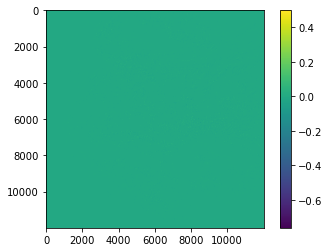

In [5]:
plt.imshow(g_f_diff, interpolation=None)
plt.colorbar()

## 转存为GeoTIFF

In [8]:
from osgeo import gdal
from osgeo import osr

In [9]:
def array2geotiff(tif_path, o_array, llon=44., tlat=60., lat_count=12000, lon_count=12000, pixel_resolution=0.01, no_data_value=0.):
    file_format = "GTiff"
    full_geotransform = [llon, pixel_resolution, 0, tlat, 0, -pixel_resolution]
    driver = gdal.GetDriverByName(file_format)
    tif_ds = driver.Create(tif_path, lon_count, lat_count, 1, gdal.GDT_Float32)
    tif_ds.SetGeoTransform(full_geotransform)
    srs = osr.SpatialReference()
    srs.ImportFromEPSG(4326)
    tif_ds.SetProjection(srs.ExportToWkt())
    tif_ds.GetRasterBand(1).SetNoDataValue(no_data_value)
    tif_ds.GetRasterBand(1).WriteArray(o_array)
    del tif_ds

In [10]:
tif_path = '/disk2/workspace/20230509/FY4A-_AGRI_GeoNEX-FYCenter_diff.tif'
array2geotiff(tif_path, g_f_diff)